In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities


# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
Invistico_Airline = pd.read_csv('Invistico_Airline.csv')
Invistico_Airline

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

In [3]:
#!pip install pyjanitor 
import janitor
Invistico_Airline = Invistico_Airline.clean_names()
print("New Janitor Column Names:\n", Invistico_Airline.columns) 

New Janitor Column Names:
 Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')


In [4]:
# Changing the column type with the astype methode.

mapping ={'satisfied': 1,'dissatisfied': 0}

In [5]:
Invistico_Airline['satisfaction'] = Invistico_Airline['satisfaction'] .map(mapping).fillna(Invistico_Airline['satisfaction'] )

In [6]:
Invistico_Airline['satisfaction'] = Invistico_Airline['satisfaction'].astype(int)

# II. Visual data analysis in python

In the field of Machine Learning, *data visualization* is not just making fancy graphics for reports; it is used extensively in day-to-day work for all phases of a project.

To start with, visual exploration of data is the first thing one tends to do when dealing with a new task. We do preliminary checks and analysis using graphics and tables to summarize the data and leave out the less important details. It is much more convenient for us, humans, to grasp the main points this way than by reading many lines of raw data. It is amazing how much insight can be gained from seemingly simple charts created with available visualization tools.

Next, when we analyze the performance of a model or report results, we also often use charts and images. Sometimes, for interpreting a complex model, we need to project high-dimensional spaces onto more visually intelligible 2D or 3D figures.

All in all, visualization is a relatively fast way to learn something new about your data. Thus, it is vital to learn its most useful techniques and make them part of your everyday ML toolbox.

We are going to get hands-on experience with visual exploration of data using popular libraries such as `matplotlib` and `seaborn`.


### Article outline

1. Dataset
2. Univariate visualization
    * 2.1 Quantitative features
    * 2.2 Categorical and binary features
3. Multivariate visualization
    * 3.1 Quantitative–Quantitative
    * 3.2 Quantitative–Categorical
    * 3.3 Categorical–Categorical
4. Whole dataset
    * 4.1 Naive approach
    * 4.2 Dimensionality reduction
    * 4.2 t-SNE
5. Useful resources

### 1. Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### 1.1 Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### 1.1.1 Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

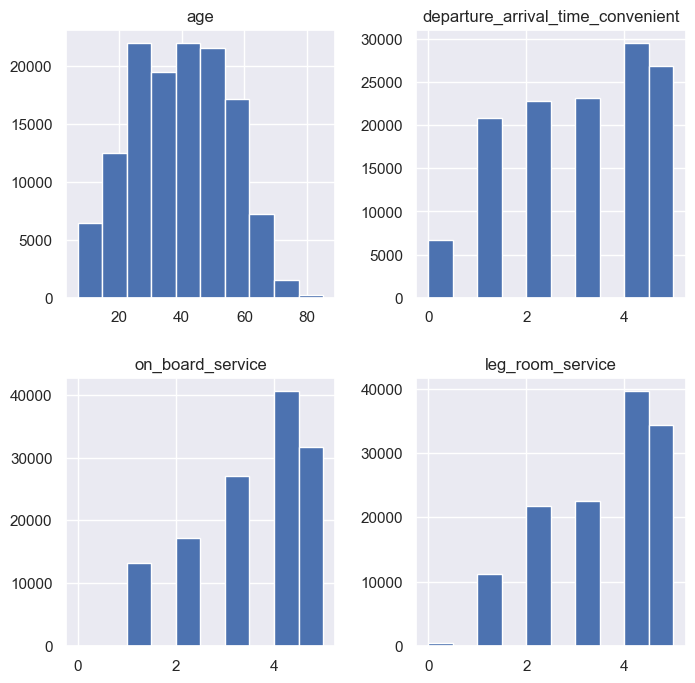

In [9]:
features = ['age', 'departure_arrival_time_convenient', 'on_board_service', 'leg_room_service']

Invistico_Airline[features].hist(figsize=(8, 8));

A histogram groups values into *bins* of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type of it, most often Gaussian.

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: *density plots* or, more formally, *Kernel Density Plots*. They can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

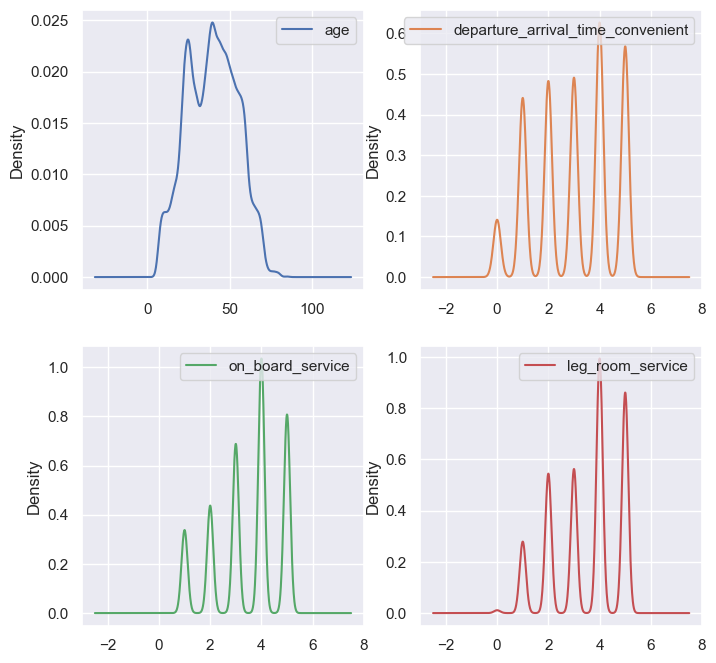

In [10]:
Invistico_Airline[features].plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(8, 8));

It is also possible to plot a distribution of observations with `seaborn`'s [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). For example, let's look at the distribution of *Total day minutes*. By default, the plot displays both the histogram with the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) on top.

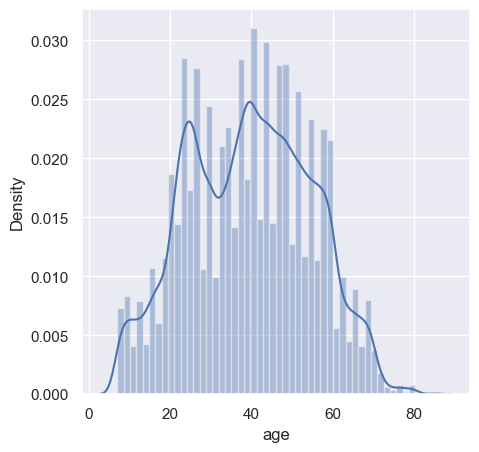

In [11]:
# increasing the width of the Chart
import seaborn as sns
plt.rcParams['figure.figsize'] = 5,5 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
sns.distplot(Invistico_Airline["age"]) # pass it one variable

# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

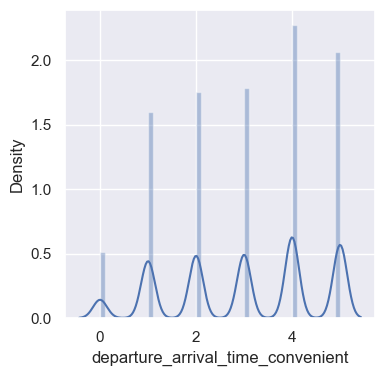

In [12]:
# increasing the width of the Chart
plt.rcParams['figure.figsize'] = 4,4 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
sns.distplot(Invistico_Airline["departure_arrival_time_convenient"]) # pass it one variable

# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

#### 1.2 Categorical and binary features

*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example. *Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called *ordinal*.

##### 1.2.1 Frequency table

Let’s check the class balance in our dataset by looking at the distribution of the target variable: the *churn rate*. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method:

In [13]:
Invistico_Airline['satisfaction'].value_counts()

1    71087
0    58793
Name: satisfaction, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not *balanced*; that is, our two target classes, satisfied and dissatisfied passenger, are not represented equally in the dataset.

##### 1.2.2 Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

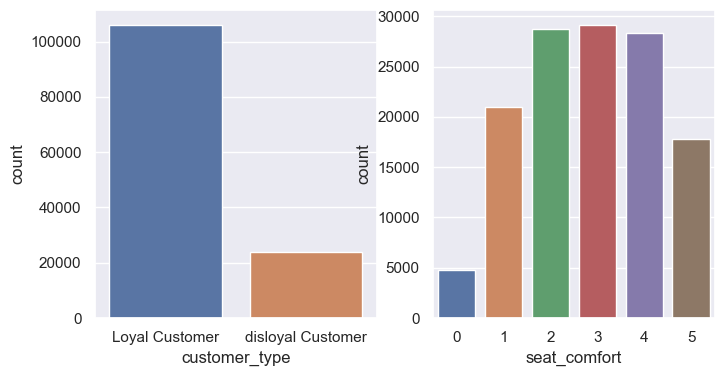

In [14]:
#I should change the flight distance graph
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.countplot(x='customer_type', data=Invistico_Airline, ax=axes[0]);
sns.countplot(x='seat_comfort', data=Invistico_Airline, ax=axes[1]);

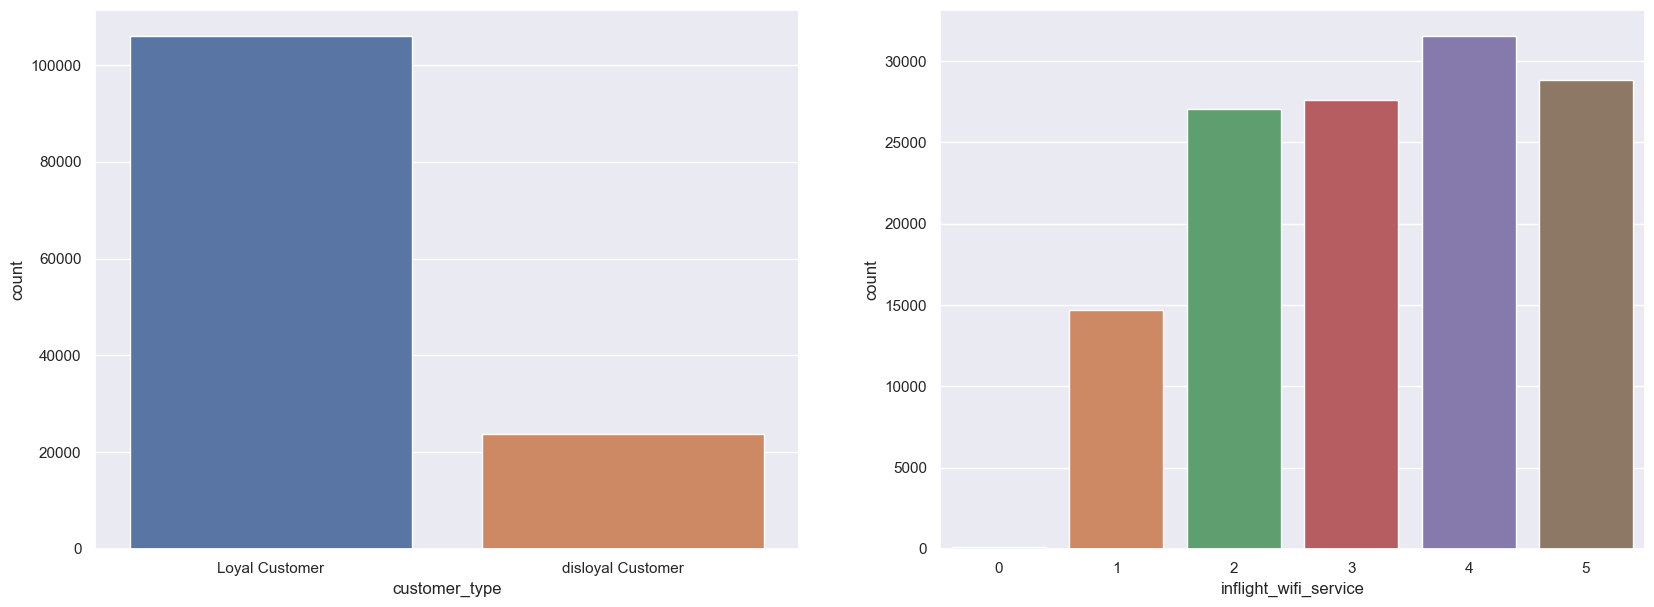

In [15]:
#I should change the flight distance graph
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

sns.countplot(x='customer_type', data=Invistico_Airline, ax=axes[0]);
sns.countplot(x='inflight_wifi_service', data=Invistico_Airline, ax=axes[1]);

#### 1.2.3. Distributions of categorical features

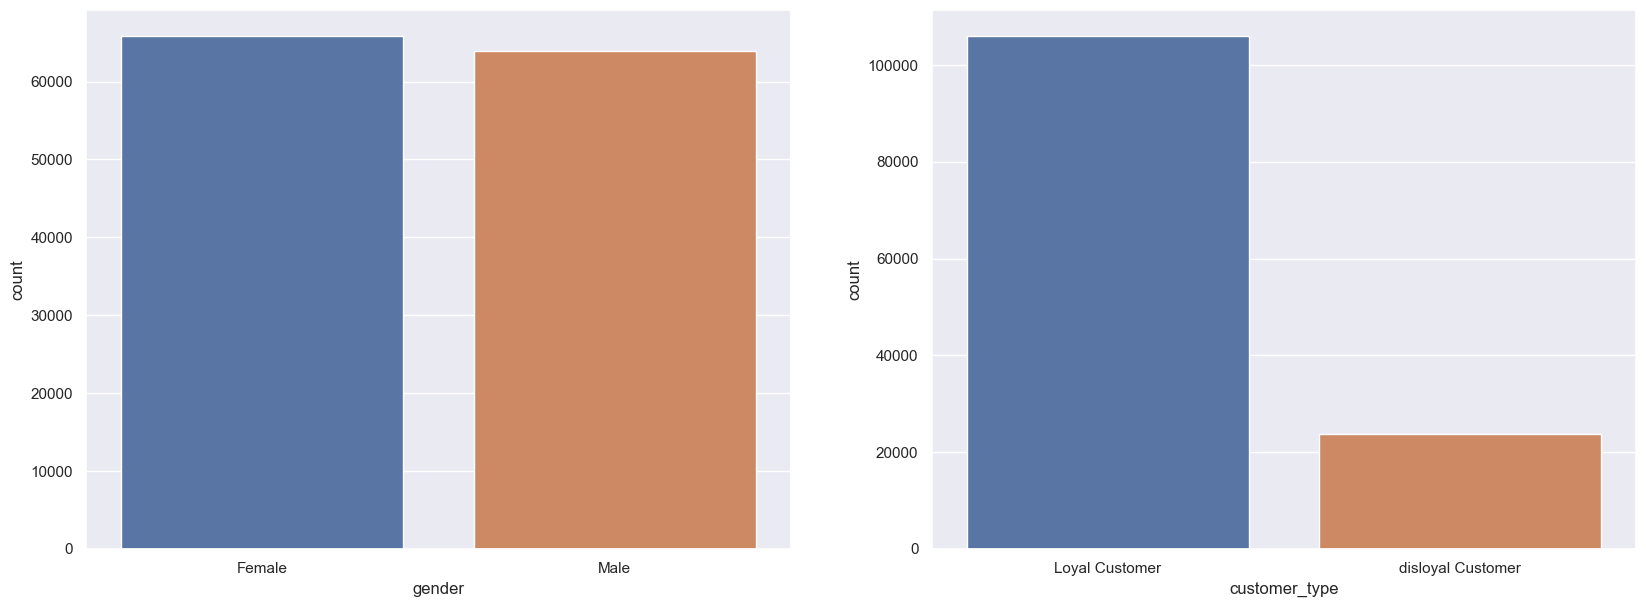

In [16]:
#I should change the flight distance graph

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

sns.countplot(x='gender', data=Invistico_Airline, ax=axes[0]);
sns.countplot(x='customer_type', data=Invistico_Airline, ax=axes[1]);

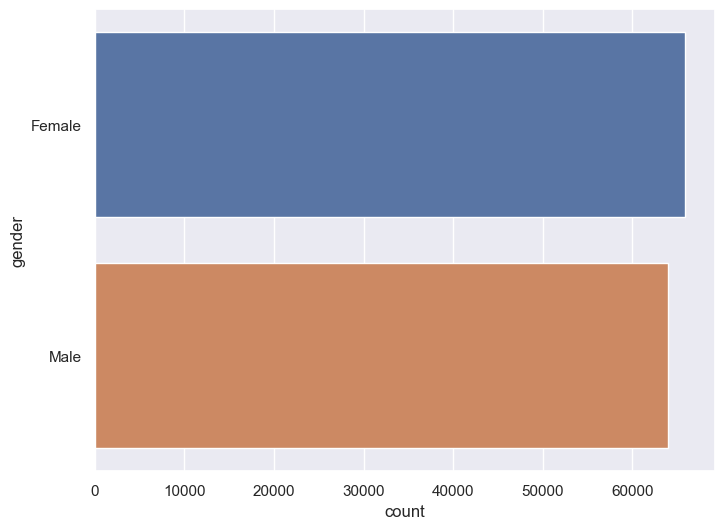

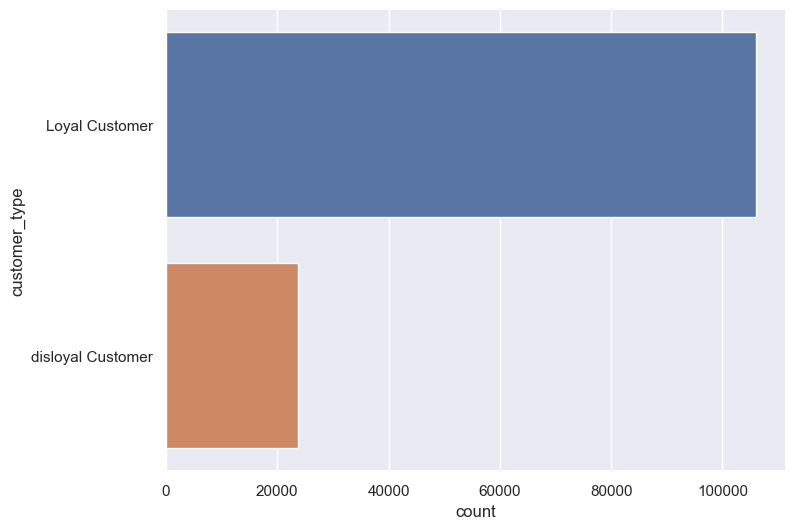

In [17]:
#I should change the flight distance graph
# Distributions of categorical features
plt.rcParams['figure.figsize'] = 8,6
sns.countplot(y='gender', data=Invistico_Airline)
plt.show()

sns.countplot(y='customer_type', data=Invistico_Airline)
plt.show()

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
1. *Histograms* are best suited for looking at the distribution of numerical variables while *bar plots* are used for categorical features.
2. The values on the X-axis in the *histogram* are numerical; a *bar plot* can have any type of values on the X-axis: numbers, strings, booleans.
3. The *histogram*'s X-axis is a *Cartesian coordinate axis* along which values cannot be changed; the ordering of the *bars* is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider *ordinal* variables (like *Customer service calls* in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

### 2. Multivariate visualization

*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 2.1 Quantitative–Quantitative

##### 2.1.1 Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:

In [18]:
Invistico_Airline.head(5)

satisfaction  gender   customer_type  age   type_of_travel     class  \
0             1  Female  Loyal Customer   65  Personal Travel       Eco   
1             1    Male  Loyal Customer   47  Personal Travel  Business   
2             1  Female  Loyal Customer   15  Personal Travel       Eco   
3             1  Female  Loyal Customer   60  Personal Travel       Eco   
4             1  Female  Loyal Customer   70  Personal Travel       Eco   

   flight_distance  seat_comfort  departure_arrival_time_convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   food_and_drink  ...  online_support  ease_of_online_booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   on_board_service  leg_room_service  baggage_handling  checkin_service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   cleanliness  online_boarding  departure_delay_in_minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   arrival_delay_in_minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [19]:
corr_matrix = Invistico_Airline.corr(method = 'kendall')  # corr(Invistico_Airline)
corr_matrix

satisfaction       age  flight_distance  \
satisfaction                           1.000000  0.107519        -0.038952   
age                                    0.107519  1.000000        -0.165961   
flight_distance                       -0.038952 -0.165961         1.000000   
seat_comfort                           0.232266  0.006751        -0.034223   
departure_arrival_time_convenient     -0.012986  0.027864         0.000660   
food_and_drink                         0.117635  0.011235        -0.007973   
gate_location                         -0.011049 -0.000396        -0.002816   
inflight_wifi_service                  0.199557  0.009516         0.004009   
inflight_entertainment                 0.519570  0.099858        -0.026938   
online_support                         0.363629  0.091912        -0.026052   
ease_of_online_booking                 0.387335  0.056565        -0.018820   
on_board_service                       0.322337  0.057867        -0.021284   
leg_room_service                       0.278201  0.068987        -0.021611   
baggage_handling                       0.262040  0.001436         0.009672   
checkin_service                        0.235003  0.026866         0.002811   
cleanliness                            0.259264 -0.003051         0.007492   
online_boarding                        0.299704  0.028466         0.003031   
departure_delay_in_minutes            -0.065274 -0.006773         0.041224   
arrival_delay_in_minutes              -0.092463 -0.008096         0.028927   

                                   seat_comfort  \
satisfaction                           0.232266   
age                                    0.006751   
flight_distance                       -0.034223   
seat_comfort                           1.000000   
departure_arrival_time_convenient      0.390587   
food_and_drink                         0.655096   
gate_location                          0.355983   
inflight_wifi_service                  0.106714   
inflight_entertainment                 0.360662   
online_support                         0.100103   
ease_of_online_booking                 0.170548   
on_board_service                       0.096832   
leg_room_service                       0.102360   
baggage_handling                       0.094276   
checkin_service                        0.035308   
cleanliness                            0.088539   
online_boarding                        0.108143   
departure_delay_in_minutes            -0.024629   
arrival_delay_in_minutes              -0.030875   

                                   departure_arrival_time_convenient  \
satisfaction                                               -0.012986   
age                                                         0.027864   
flight_distance                                             0.000660   
seat_comfort                                                0.390587   
departure_arrival_time_convenient                           1.000000   
food_and_drink                                              0.493449   
gate_location                                               0.502510   
inflight_wifi_service                                      -0.003309   
inflight_entertainment                                      0.052347   
online_support                                             -0.002426   
ease_of_online_booking                                     -0.003171   
on_board_service                                            0.047523   
leg_room_service                                            0.017690   
baggage_handling                                            0.062412   
checkin_service                                             0.052662   
cleanliness                                                 0.063094   
online_boarding                                            -0.002015   
departure_delay_in_minutes                                 -0.003644   
arrival_delay_in_minutes                                   -0.005453   

            

<h4>Highly correlated items = not good!</h4>
<h4>Low correlated items = good </h4>
<h4>Correlations with target (dv) = good (high predictive power)</h4>

<Axes: >

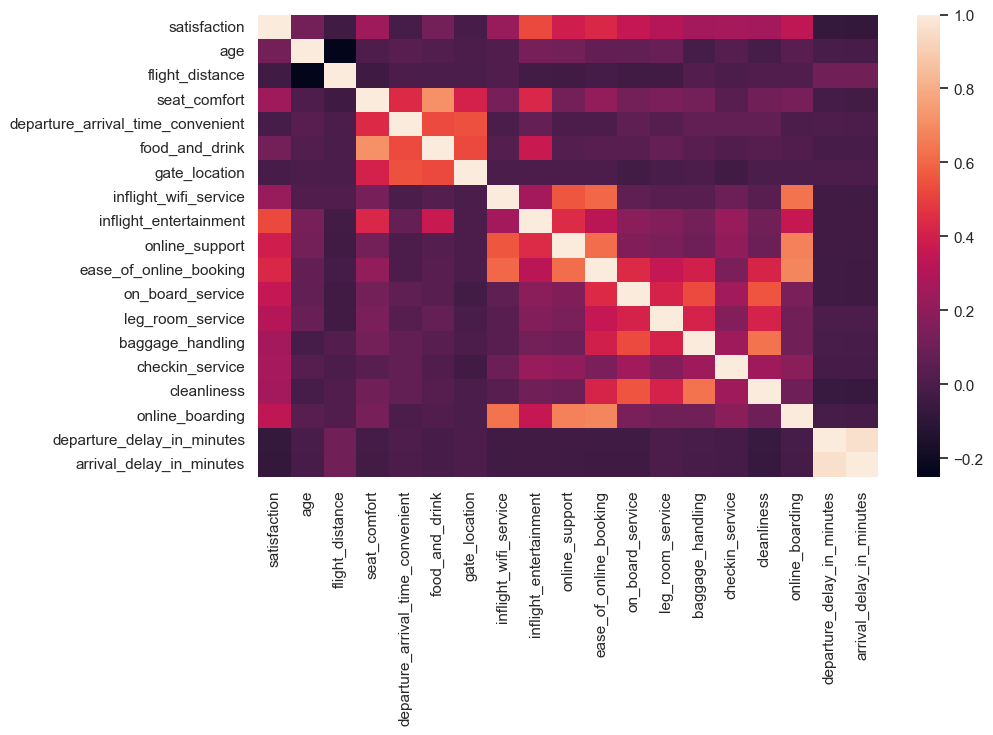

In [20]:
#### 4.2 Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 10,6  # control plot sizeimport seaborn as sns
sns.heatmap(Invistico_Airline.corr())

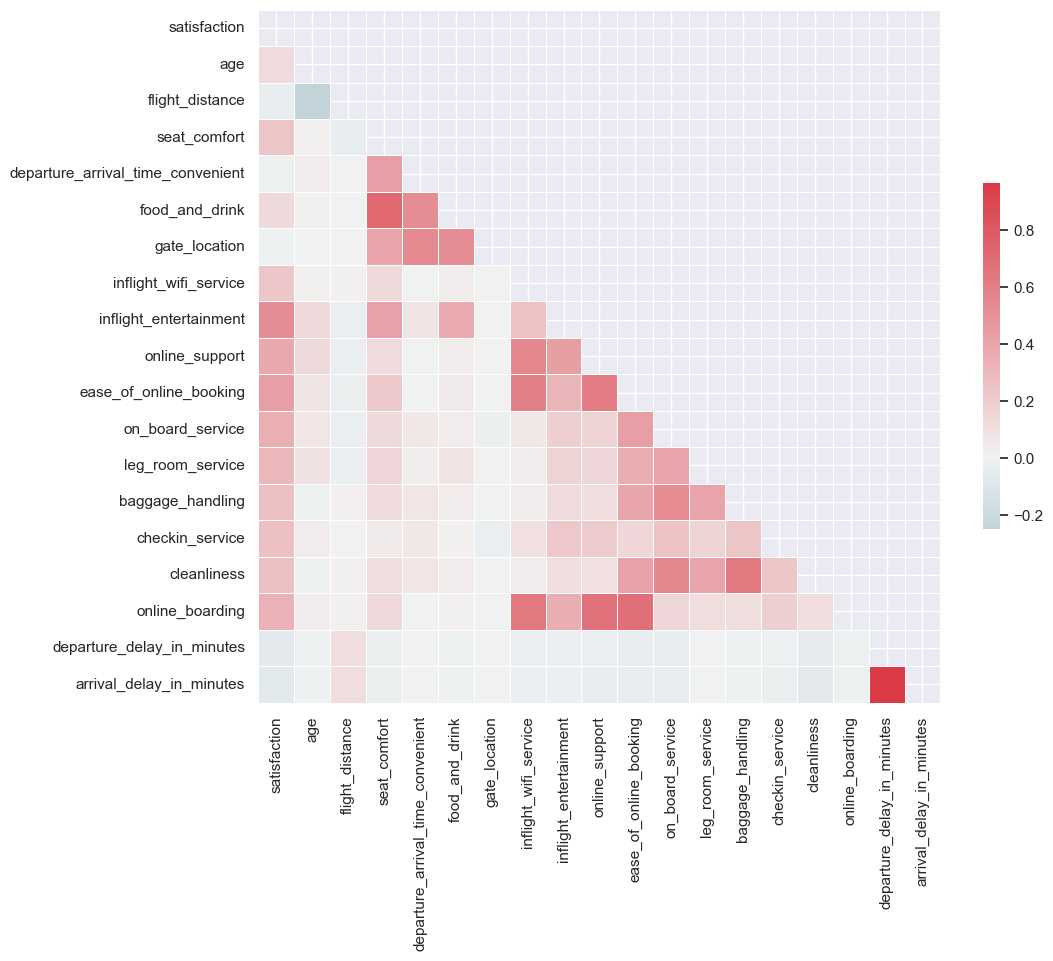

In [21]:
# seaborn
## first_twenty = har_train.iloc[:, :20] # pull out first 20 feats
corr = Invistico_Airline.corr()  # compute correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)  # make mask
mask[np.triu_indices_from(mask)] = True  # mask the upper triangle

fig, ax = plt.subplots(figsize=(11, 9))  # create a figure and a subplot
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidth=0.5,
    cbar_kws={'shrink': 0.5}
);

In [22]:
Invistico_Airline.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

##### How to calculate correlation between all columns and remove highly correlated ones using pandas?

In [23]:
import numpy as np

# # Create correlation matrix
corr_matrix = Invistico_Airline.corr().abs()

# # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# # Drop features 
Invistico_Airline.drop(to_drop, axis=1, inplace=True)

Invistico_Airline.shape

(129880, 22)

<Axes: >

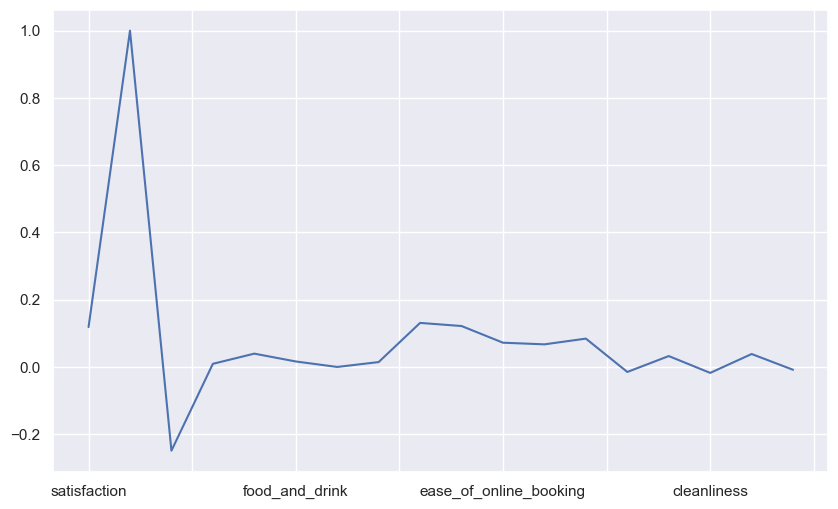

In [24]:
# # Correlation with Target Variable

Invistico_Airline.corr()['age'].plot()

<h3>Pandas scatter matrix function helps visualize the relationship between features</h3>
Use with care though, because it is processor intensive

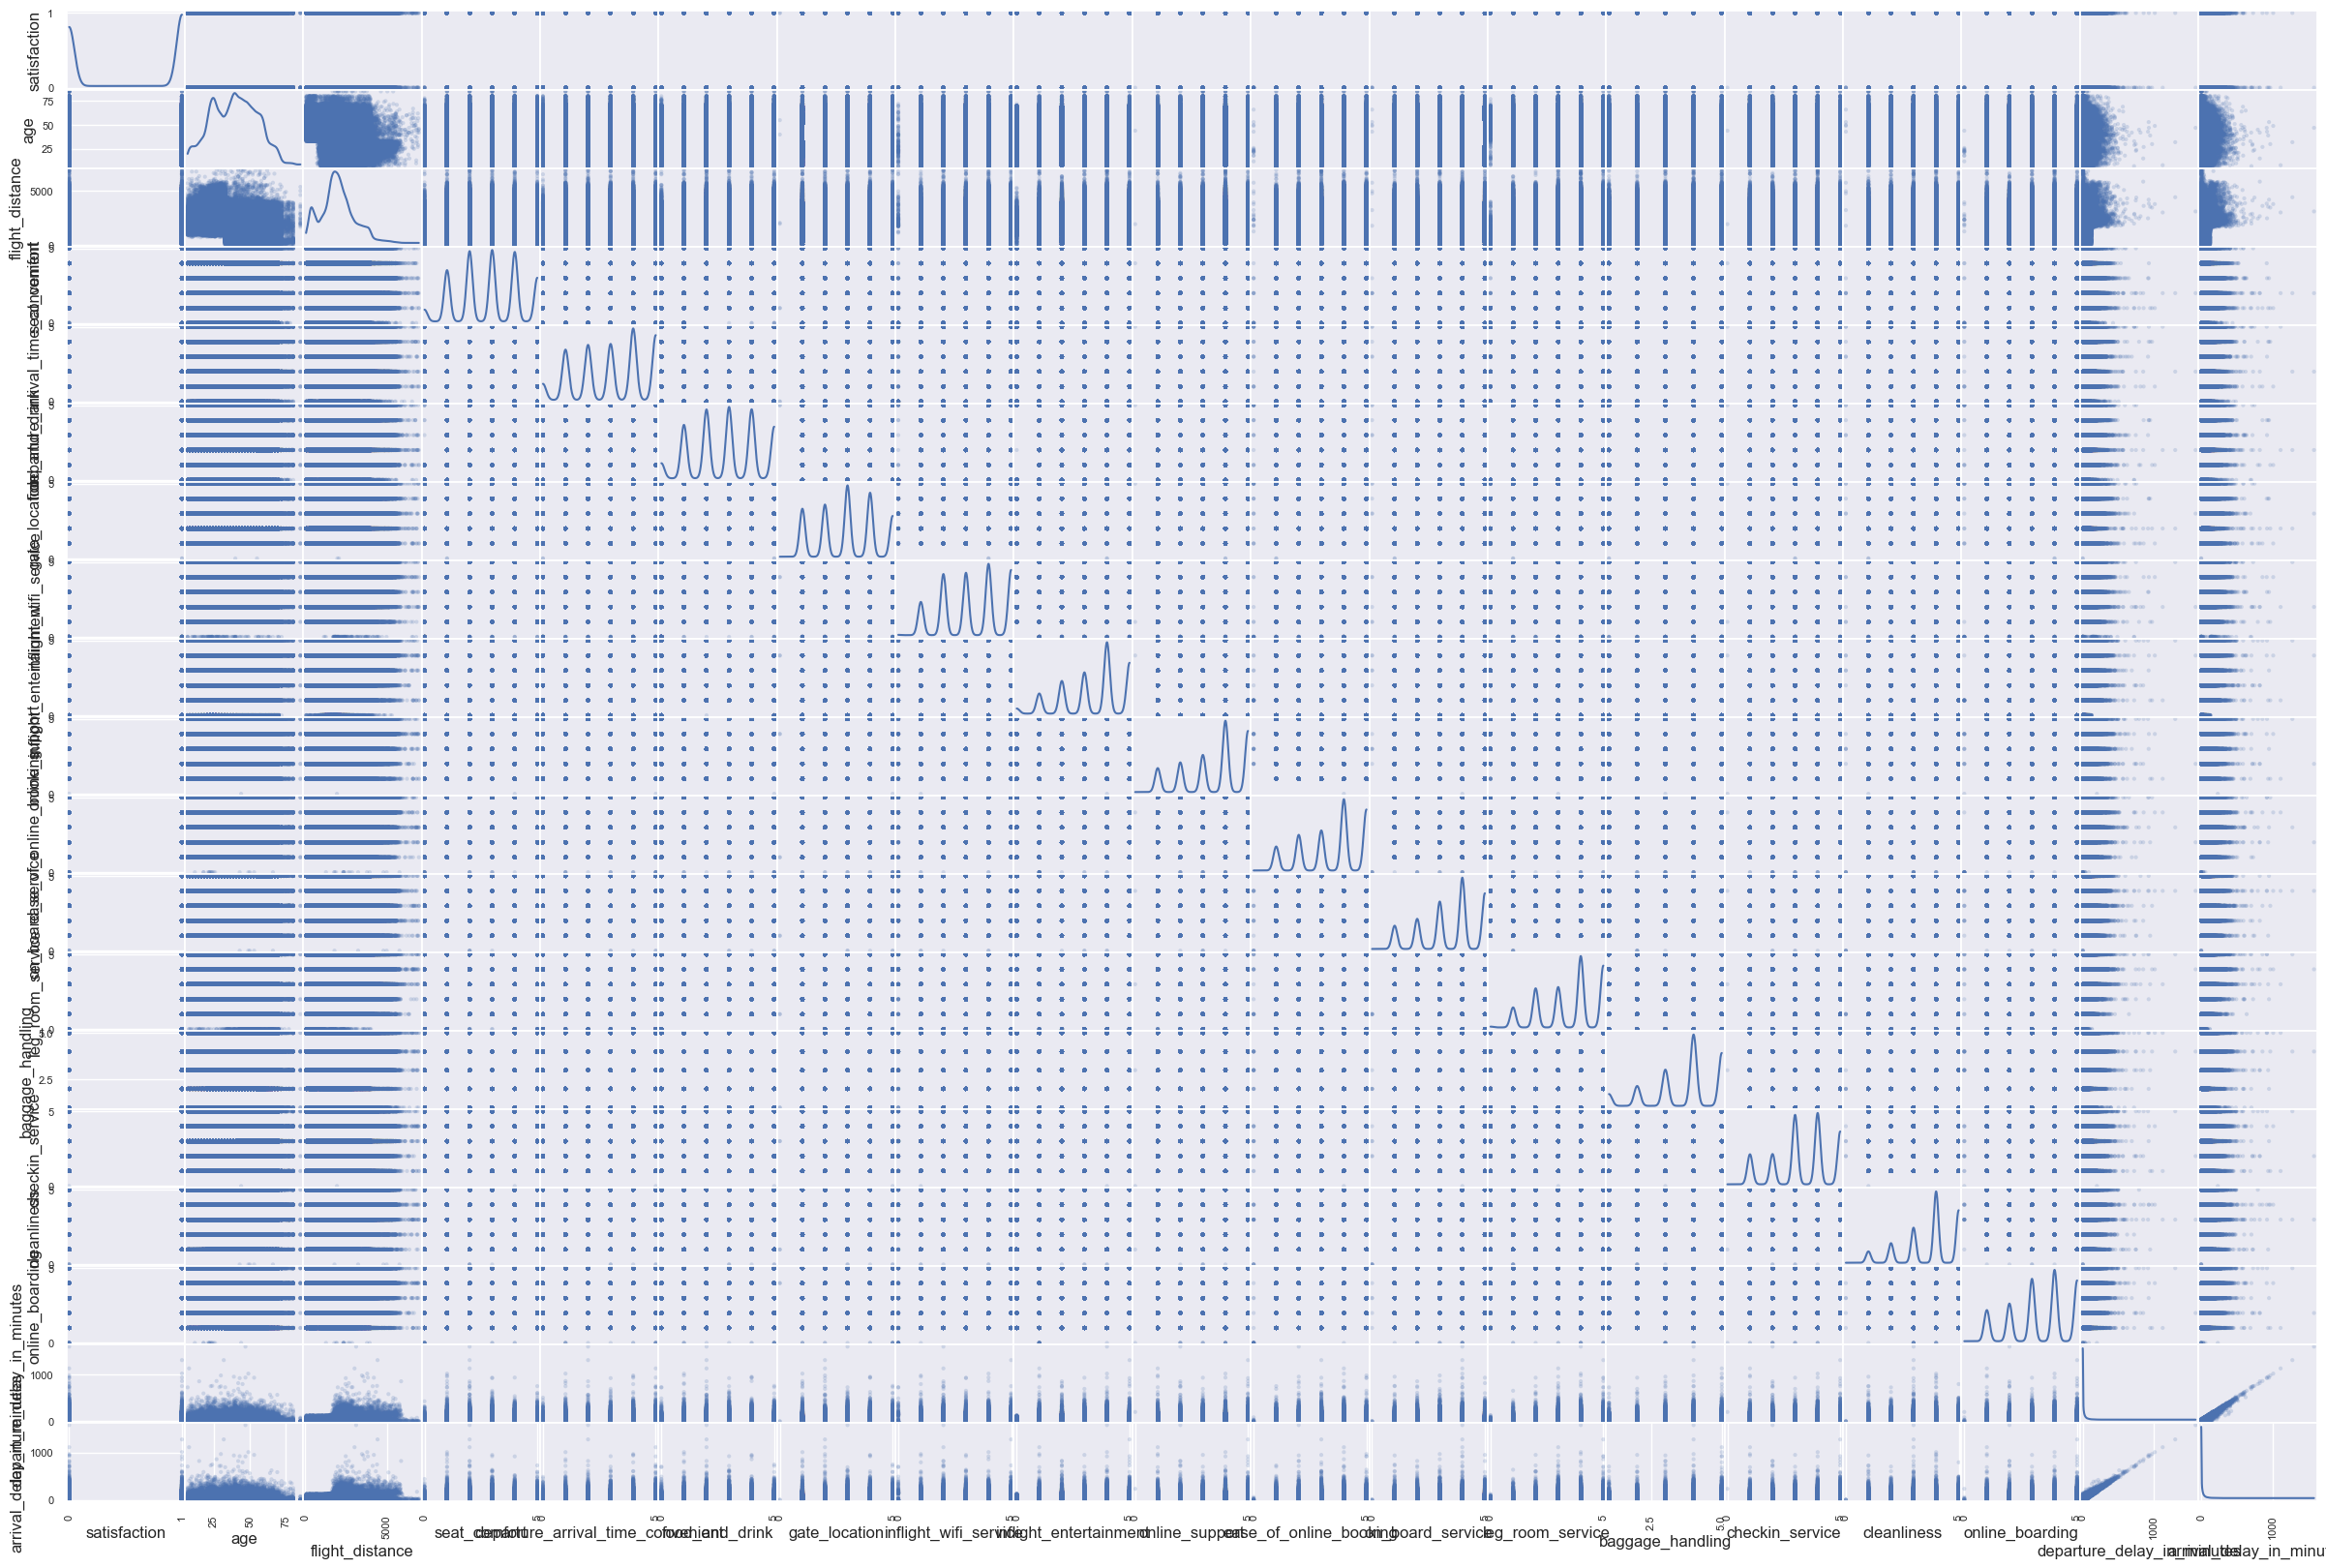

In [10]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(Invistico_Airline, alpha=0.2, figsize=(30, 20), diagonal='kde')

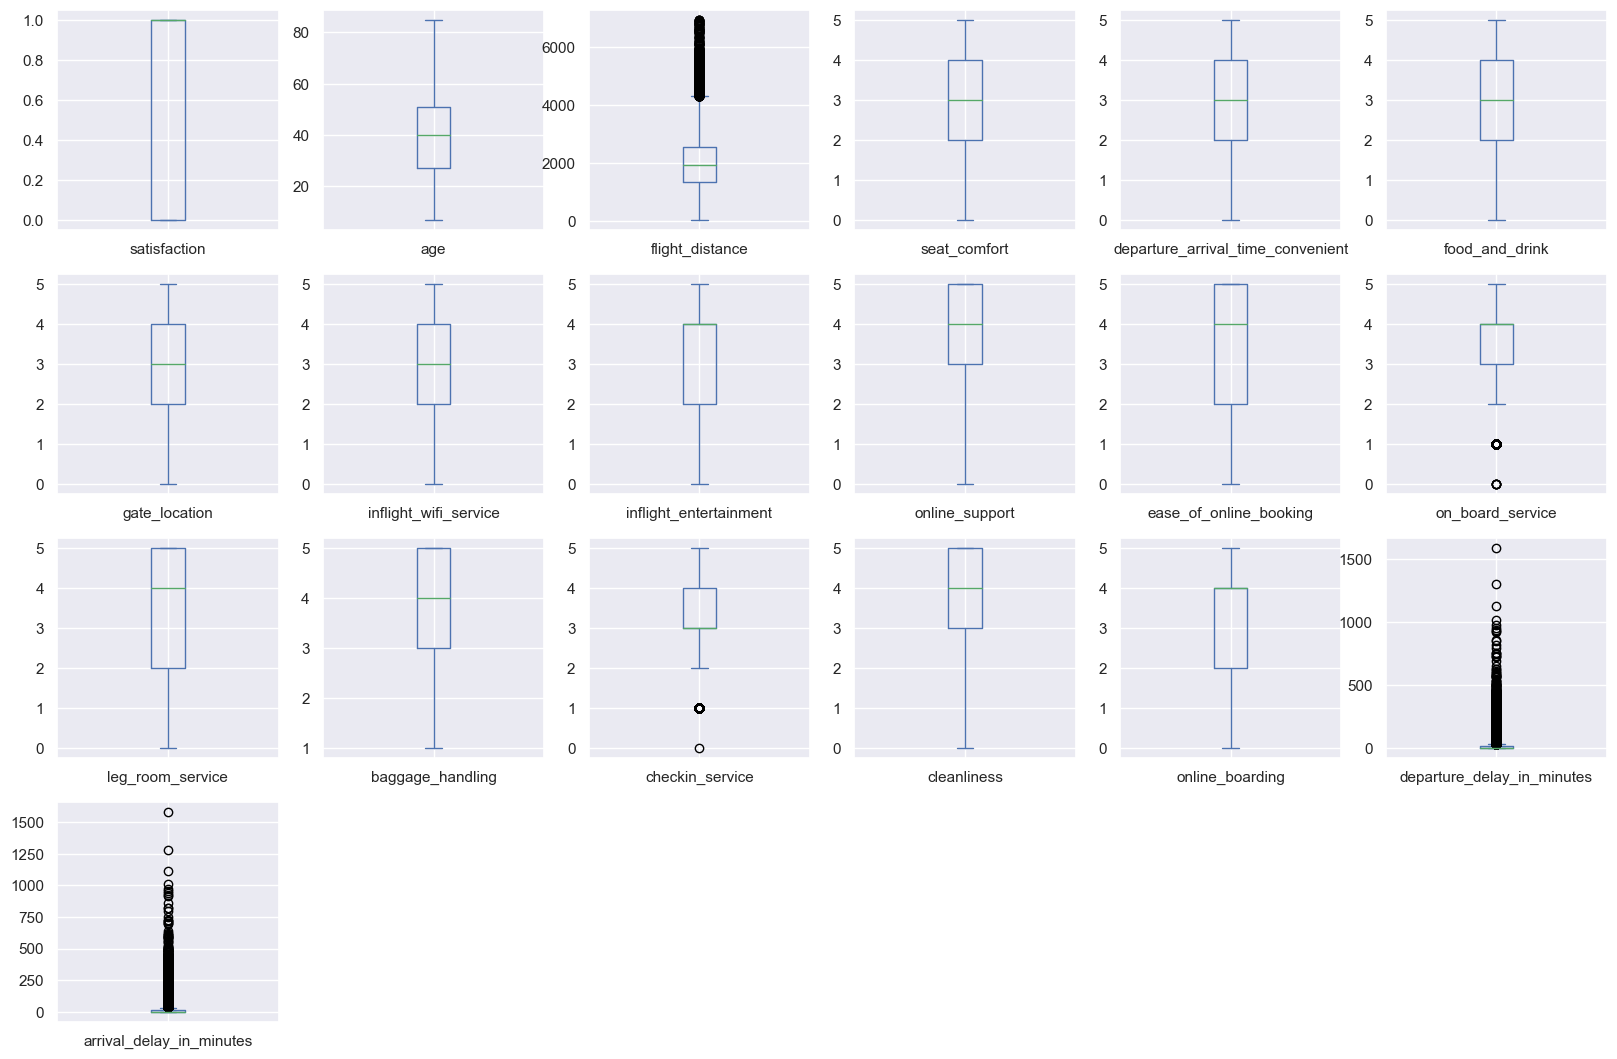

In [11]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
Invistico_Airline.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()


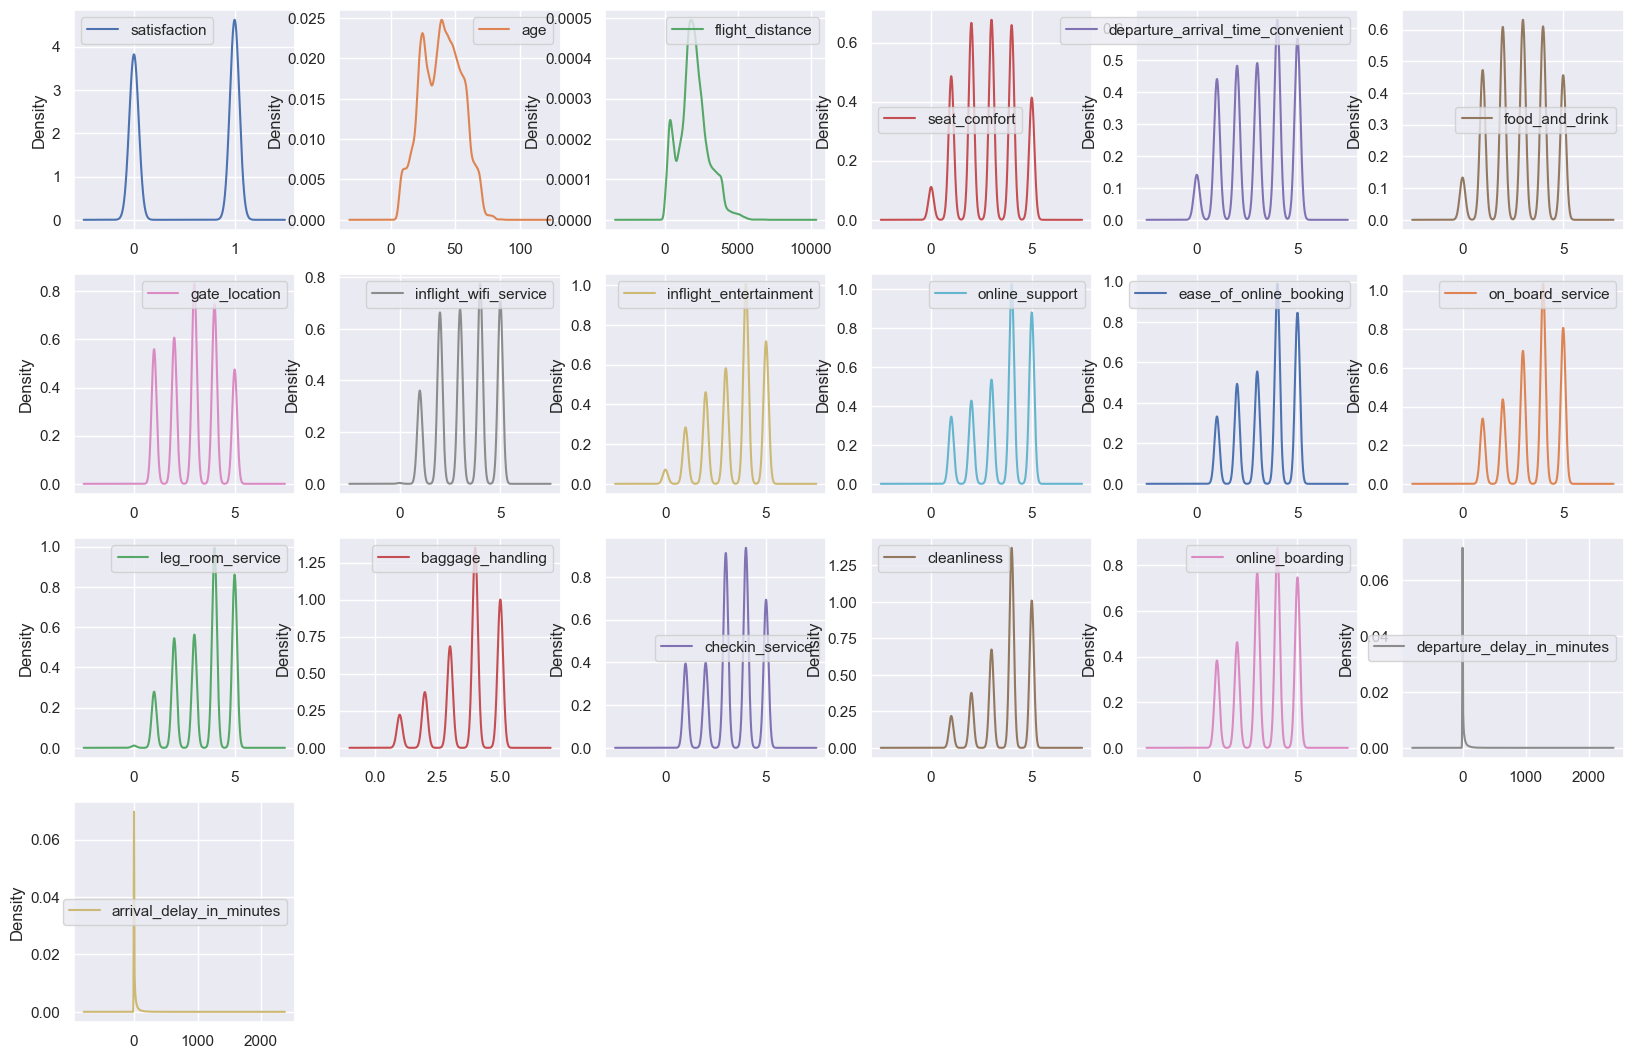

In [12]:
# Univariate Density Plots
plt.rcParams['figure.figsize'] = 20,20  # control plot size

Invistico_Airline.plot(kind='density', subplots=True, layout=(6,6), sharex=False)
plt.show()


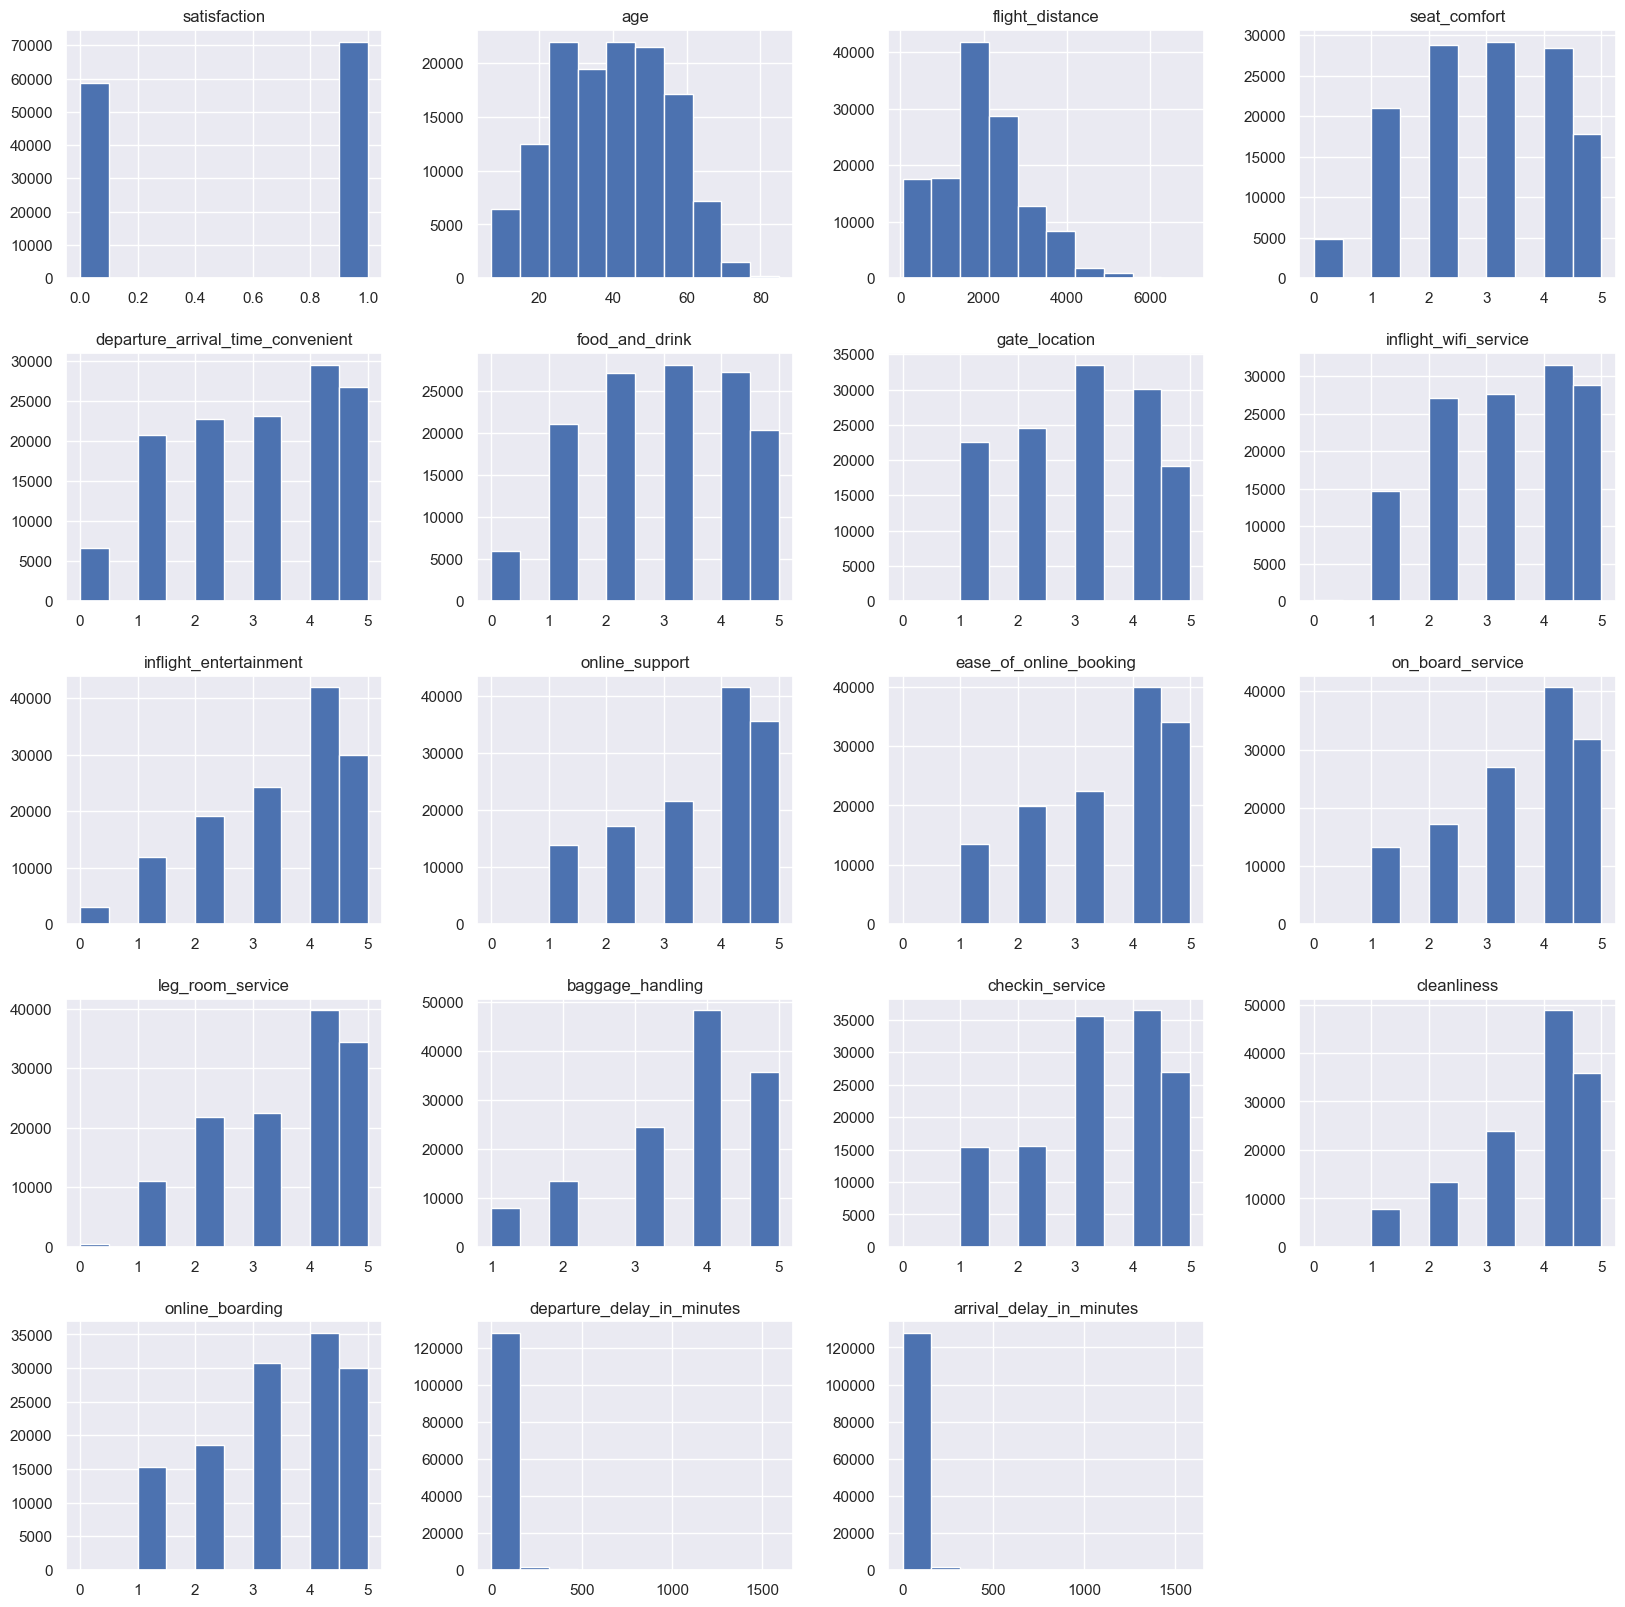

In [13]:
# Univariate Histograms
plt.rcParams['figure.figsize'] = 20,20  # control plot size

Invistico_Airline.hist()
plt.show()


##### 2.1.2 Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space. Scatter plots in 3D are also possible.

Let's try out the function [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) from the `matplotlib` library:

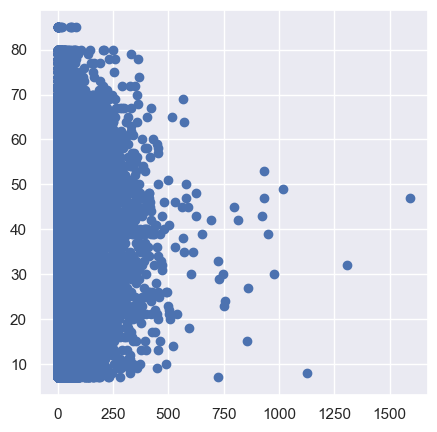

In [29]:
plt.rcParams['figure.figsize'] = 5,5

plt.scatter(Invistico_Airline['departure_delay_in_minutes'], Invistico_Airline['age']);

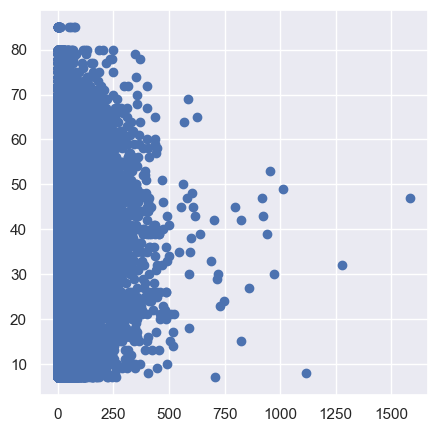

In [7]:
plt.rcParams['figure.figsize'] = 5,5

plt.scatter(Invistico_Airline['arrival_delay_in_minutes'], Invistico_Airline['age']);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellpise-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:

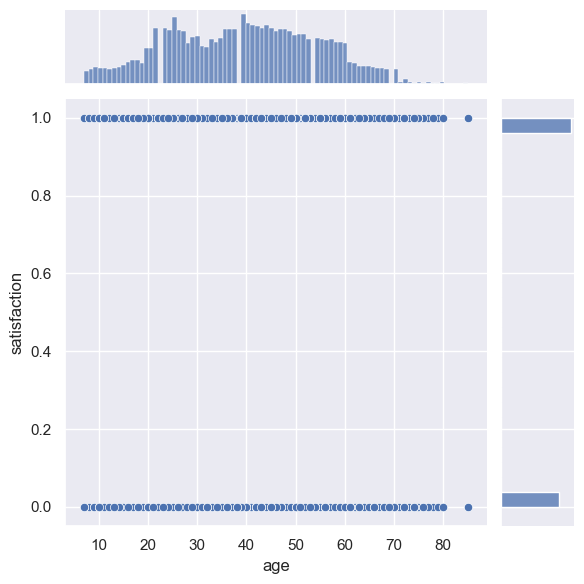

In [8]:
sns.jointplot(x='age', y='satisfaction', 
              data=Invistico_Airline, kind='scatter');

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### 2.1.3 Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

C:\ProgramData\anaconda3\lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


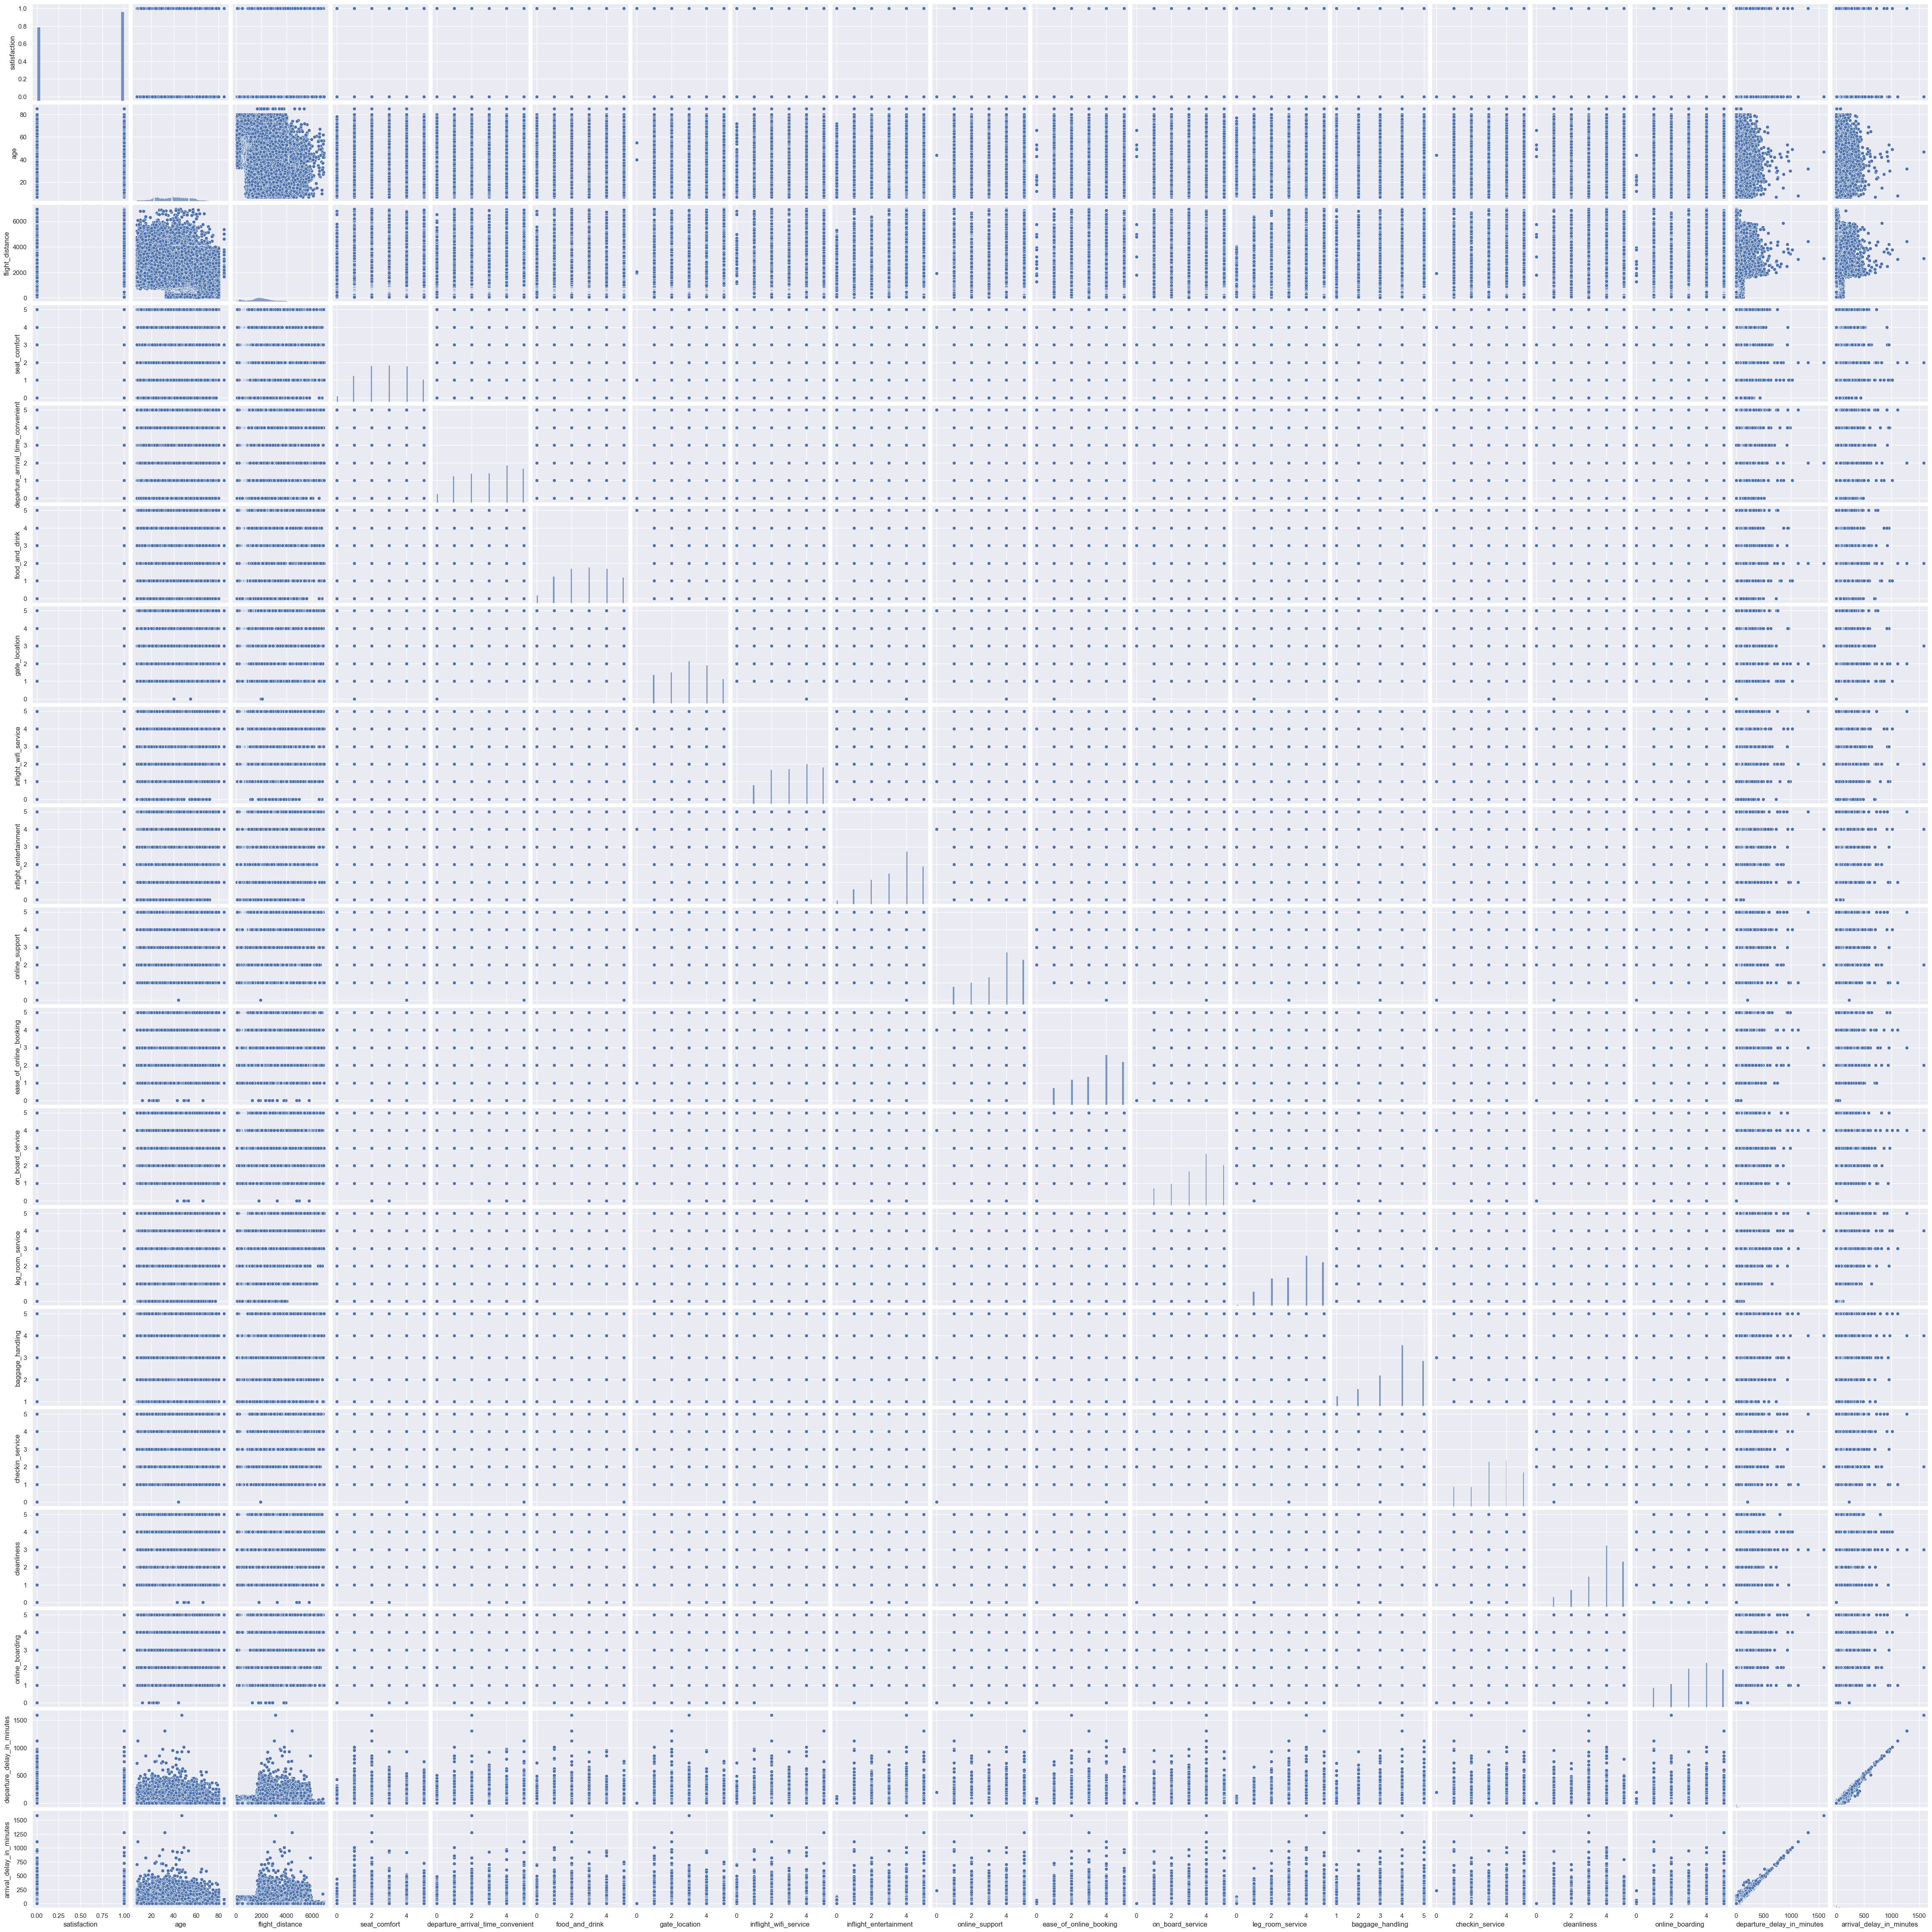

In [9]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(Invistico_Airline);

Because of this unbalanced data, we will make sure that both our training set and testing set **maintain this ratio** of good:bad loans. This is acheived by using the `stratify` argument in the `train_test_split()` function, which was imported from the `sklearn.model_selection` module.